# Coal production in mines 2013

by: Indra 

Abstract: We did a lot of analysis and came to some interisting conclusions

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set();

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

## Cleaned Data
We cleaned this data in the notebook stored in: deliver\Data_cleaning.ipynb

In [11]:
df = pd.read_csv("../data/cleaned_coalpublic2013.csv", index_col='MSHA ID')
df[['Year', 'Mine_Name']].head()

,Year,Mine_Name
MSHA ID,,
103381,2013,Tacoa Highwall Miner
103404,2013,Reid School Mine
100759,2013,North River #1 Underground Min
103246,2013,Bear Creek
103451,2013,Knight Mine


# Predict the Production of coal mines

In [12]:
features = ['Average_Employees',
            'Labor_Hours'
            ]

categoricals = ['Mine_State',
                'Mine_County',
                'Mine_Status',
                'Mine_Type',
                'Company_Type',
                'Operation_Type',
                'Union_Code',
                'Coal_Supply_Region',
                ]

target = 'log_production'

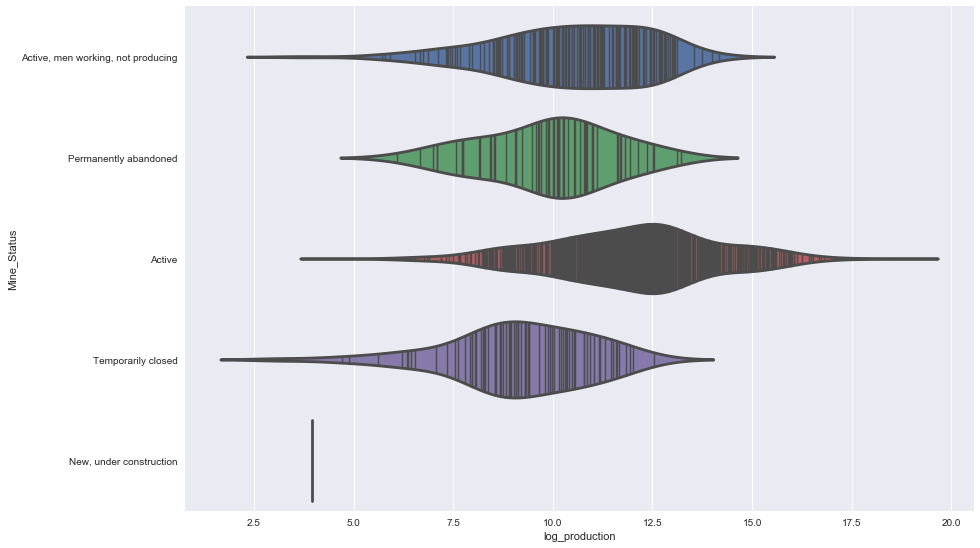

In [13]:
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y='Mine_Status', x="log_production", data=df, split=True, inner="stick")
plt.tight_layout()

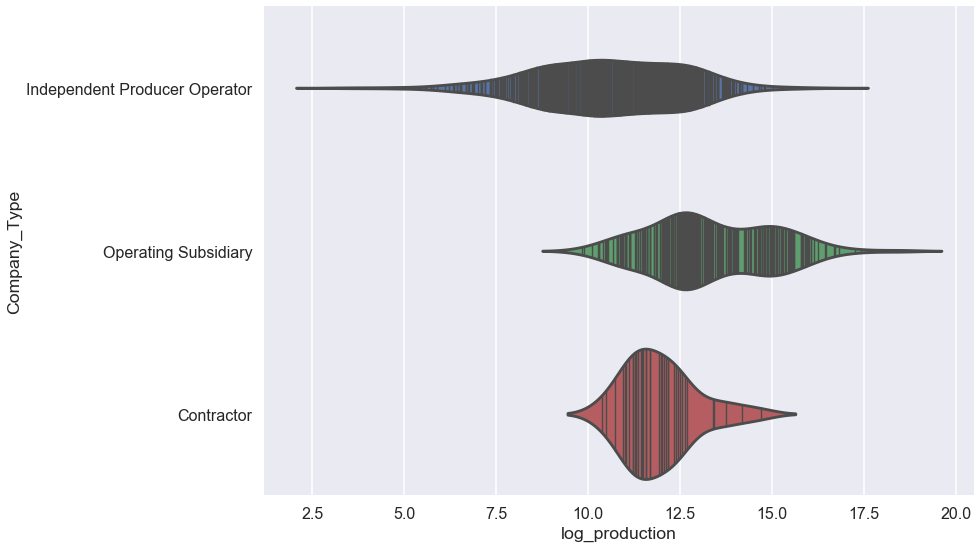

In [14]:
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y='Company_Type', x="log_production", data=df, split=True, inner="stick")
plt.tight_layout()
plt.savefig("../figures/Coal_prediction_company_type_vs_log_production.png")

In [15]:
df.Company_Type.unique()

array(['Independent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

In [16]:
pd.get_dummies(df.Company_Type).sample(50).head()

,Contractor,Independent Producer Operator,Operating Subsidiary
MSHA ID,,,
1517497,0,0,1
504864,0,0,1
4609440,0,1,0
3610027,0,1,0
100515,0,1,0


In [19]:
dummy_categoricals = []
for categorical in categoricals:
    #Avoid the dummy variable trap!
    drop_var = sorted(df[categorical].unique())[-1]
    temp_df = pd.get_dummies(df[categorical], prefix=categorical)
    df = pd.concat([df, temp_df], axis=1)
    temp_df.drop('_'.join([categorical, str(drop_var)]), axis=1, inplace=True)
    dummy_categoricals += temp_df.columns.tolist()

In [18]:
dummy_categoricals[:10]

['Mine_State_Alabama',
 'Mine_State_Alaska',
 'Mine_State_Arizona',
 'Mine_State_Arkansas',
 'Mine_State_Colorado',
 'Mine_State_Illinois',
 'Mine_State_Indiana',
 'Mine_State_Kansas',
 'Mine_State_Kentucky (East)',
 'Mine_State_Kentucky (West)']

# Random Forest Regressor

In [28]:
train, test = train_test_split(df, test_size=0.3)

In [29]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True)

rf.fit(train[features + dummy_categoricals], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

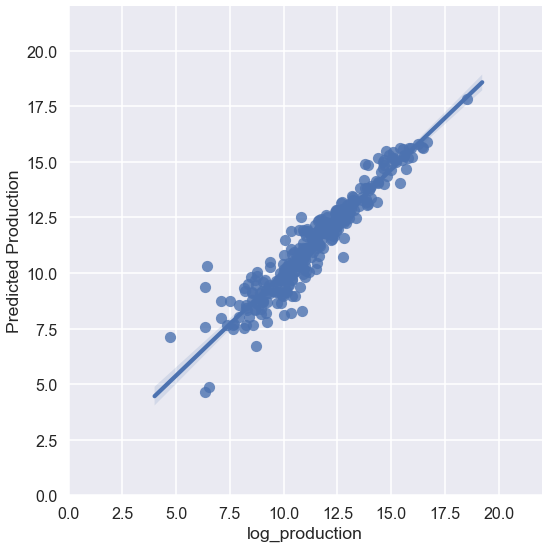

In [30]:
fig = plt.subplots(figsize=(8,8))
sns.regplot(test[target], rf.predict(test[features + dummy_categoricals]))
plt.ylabel("Predicted Production")
plt.xlim(0, 22)
plt.ylim(0, 22)
plt.tight_layout()

In [32]:
predicted = rf.predict(test[features + dummy_categoricals])
print "R^2 score:", r2_score(test[target], predicted)
#explained_variance_score(test[target], predicted)
print "MSE:",mean_squared_error(test[target], predicted)

R^2 score: 0.8929932706362349
MSE: 0.5096658257487297


In [34]:
rf_importances = pd.DataFrame({'name':train[features + dummy_categoricals].columns,
                              'importance': rf.feature_importances_}).sort_values(by='importance',
                                                                                 ascending=False).reset_index(drop=True)
rf_importances.head(5)

,importance,name
0,0.828374,Labor_Hours
1,0.070040,Average_Employees
2,0.004805,Coal_Supply_Region_Powder River Basin
3,0.004109,Mine_Type_Surface
4,0.003984,Mine_Type_Surface


# Conclusion

bla bla bla